In [37]:
import os
print(os.listdir('/content'))


['.config', 'processed_images.csv', 'english.csv', '.ipynb_checkpoints', 'sample_data']


In [38]:
from google.colab import files
uploaded = files.upload()  # Upload Img.zip


Saving Img.zip to Img.zip


In [39]:
!unzip Img.zip -d /content/

Archive:  Img.zip
   creating: /content/Img/
  inflating: /content/Img/img001-001.png  
  inflating: /content/Img/img001-002.png  
  inflating: /content/Img/img001-003.png  
  inflating: /content/Img/img001-004.png  
  inflating: /content/Img/img001-005.png  
  inflating: /content/Img/img001-006.png  
  inflating: /content/Img/img001-007.png  
  inflating: /content/Img/img001-008.png  
  inflating: /content/Img/img001-009.png  
  inflating: /content/Img/img001-010.png  
  inflating: /content/Img/img001-011.png  
  inflating: /content/Img/img001-012.png  
  inflating: /content/Img/img001-013.png  
  inflating: /content/Img/img001-014.png  
  inflating: /content/Img/img001-015.png  
  inflating: /content/Img/img001-016.png  
  inflating: /content/Img/img001-017.png  
  inflating: /content/Img/img001-018.png  
  inflating: /content/Img/img001-019.png  
  inflating: /content/Img/img001-020.png  
  inflating: /content/Img/img001-021.png  
  inflating: /content/Img/img001-022.png  
  inflati

In [40]:
import os
print(os.listdir('/content/Img'))  # Should list .png files

['img010-039.png', 'img056-013.png', 'img059-037.png', 'img017-003.png', 'img030-006.png', 'img027-014.png', 'img044-021.png', 'img057-013.png', 'img020-047.png', 'img033-010.png', 'img005-016.png', 'img005-055.png', 'img003-019.png', 'img006-033.png', 'img043-027.png', 'img022-036.png', 'img056-023.png', 'img050-023.png', 'img058-001.png', 'img022-012.png', 'img010-014.png', 'img020-034.png', 'img015-025.png', 'img034-042.png', 'img032-018.png', 'img022-035.png', 'img021-028.png', 'img028-021.png', 'img044-022.png', 'img008-021.png', 'img052-049.png', 'img026-036.png', 'img007-051.png', 'img006-039.png', 'img043-006.png', 'img025-035.png', 'img053-006.png', 'img007-043.png', 'img031-014.png', 'img054-043.png', 'img049-029.png', 'img014-028.png', 'img016-031.png', 'img034-010.png', 'img008-054.png', 'img004-019.png', 'img001-019.png', 'img022-027.png', 'img034-028.png', 'img046-050.png', 'img005-018.png', 'img060-020.png', 'img047-049.png', 'img039-013.png', 'img037-029.png', 'img054-0

In [41]:
img_dir = '/content/Img'
all_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]

In [44]:
import os

img_dir = '/content/Img' # Changed 'img' to 'Img' to match the unzipped directory
files = os.listdir(img_dir)
print(f"Total images: {len(files)}")
print(files[:10])  # Show first 10 files

Total images: 3410
['img010-039.png', 'img056-013.png', 'img059-037.png', 'img017-003.png', 'img030-006.png', 'img027-014.png', 'img044-021.png', 'img057-013.png', 'img020-047.png', 'img033-010.png']


In [45]:
import pandas as pd

df = pd.read_csv('/content/english.csv')
print(df['image'].head())


0    Img/img001-001.png
1    Img/img001-002.png
2    Img/img001-003.png
3    Img/img001-004.png
4    Img/img001-005.png
Name: image, dtype: object


In [47]:
import pandas as pd
import os
import cv2
import numpy as np

# Paths
csv_path = '/content/english.csv'
img_dir = '/content/Img'

# Step 1: Load CSV and available image filenames
df = pd.read_csv(csv_path)
available_images = set(os.listdir(img_dir))

# Step 2: Extract base filenames from CSV and match with available files
df['image_filename'] = df['image'].apply(lambda x: os.path.basename(str(x)).strip())

# Step 3: Keep only rows with matching image files and desired labels
df_filtered = df[df['image_filename'].isin(available_images)]
df_filtered = df_filtered[df_filtered['label'].isin(['N', 'G'])]

print(f"🧹 Filtered to {len(df_filtered)} images with labels 'N' or 'G' that actually exist.")

# Step 4: Process images
data = []

for _, row in df_filtered.iterrows():
    image_path = os.path.join(img_dir, row['image_filename'])
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"⚠️ Could not read {image_path}")
        continue

    resized = cv2.resize(image, (28, 28))
    flat = resized.flatten()
    numeric_label = 1 if row['label'] == 'N' else 0
    data.append(np.append(flat, numeric_label))

# Step 5: Create and save DataFrame
if data:
    num_features = len(data[0]) - 1
    col_names = [f'pixel_{i}' for i in range(num_features)] + ['label']
    df_processed = pd.DataFrame(data, columns=col_names)
    df_processed.to_csv('processed_images.csv', index=False)
    print(f"✅ Saved {len(df_processed)} processed images to 'processed_images.csv'")
else:
    print("❌ No data was processed. Check image filenames or filtering logic.")


🧹 Filtered to 110 images with labels 'N' or 'G' that actually exist.
✅ Saved 110 processed images to 'processed_images.csv'


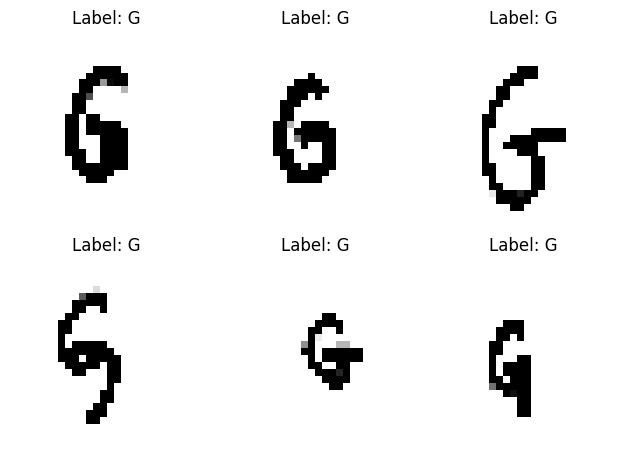

In [51]:
import matplotlib.pyplot as plt

# Load the processed data
df = pd.read_csv('processed_images.csv')

# Plot 6 samples
for i in range(6):
    pixels = df.iloc[i, :-1].values.reshape(28, 28)
    label = df.iloc[i, -1]
    plt.subplot(2, 3, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Label: {'N' if label == 1 else 'G'}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load processed CSV
processed_data = pd.read_csv('processed_images.csv')

# Step 2: Split data into balanced train and test sets
def split_data(processed_df):
    # Separate by label
    class_0 = processed_df[processed_df['label'] == 0]
    class_1 = processed_df[processed_df['label'] == 1]

    # Split each class into train and test subsets (stratified split)
    train_0, test_0 = train_test_split(class_0, test_size=0.2, random_state=42)
    train_1, test_1 = train_test_split(class_1, test_size=0.2, random_state=42)

    # Combine and shuffle train/test sets
    train_data = pd.concat([train_0, train_1]).sample(frac=1, random_state=42).reset_index(drop=True)
    test_data = pd.concat([test_0, test_1]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Split into features and labels
    X_train = train_data.iloc[:, :-1].values
    y_train = train_data.iloc[:, -1].values
    X_test = test_data.iloc[:, :-1].values
    y_test = test_data.iloc[:, -1].values

    return X_train, X_test, y_train, y_test

# Step 3: Initialize weights and hyperparameters
def initialize_parameters(num_features):
    weights = np.random.rand(num_features)  # Initialize random weights
    learning_rate = 0.01  # Learning rate
    num_iterations = 20   # Number of training iterations
    return weights, learning_rate, num_iterations

# Step 4: Call the functions
X_train, X_test, y_train, y_test = split_data(processed_data)
num_features = X_train.shape[1]
weights, learning_rate, num_iterations = initialize_parameters(num_features)

# Display training setup
print(f"✅ Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"📌 Learning rate: {learning_rate}")
print(f"🔁 Number of iterations: {num_iterations}")


✅ Training samples: 88, Test samples: 22
📌 Learning rate: 0.01
🔁 Number of iterations: 20


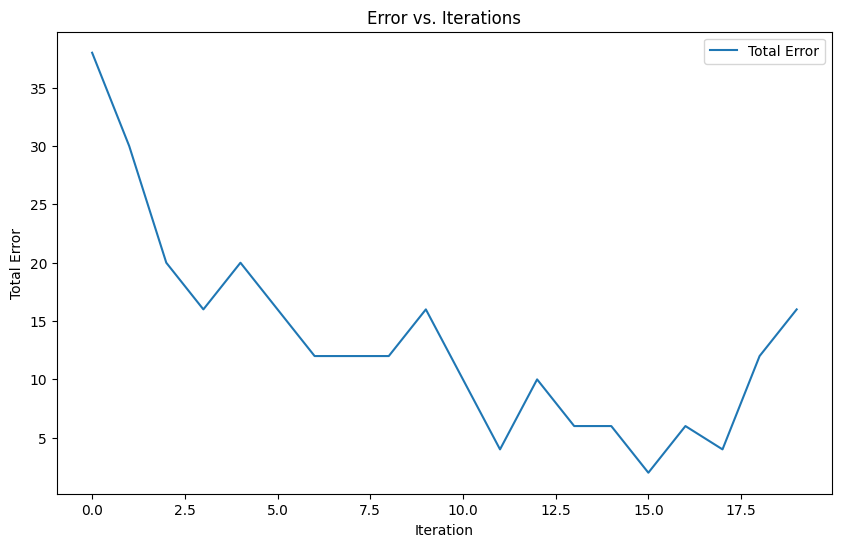

Trained weights: [ 6.27756266e-01  6.93646014e-01  1.64961806e-01  3.22186722e-01
  8.44925155e-01  4.01764762e-01  9.62969783e-01  5.85886839e-01
  6.34118453e-01  6.65918725e-01  1.64228562e-01  2.33427869e-01
  2.20878785e-01  8.58929576e-01  4.42293962e-01  5.56106110e-01
  5.54259040e-01  2.77496372e-01  8.07625934e-02  4.35447015e-01
  8.76681897e-01  2.38905393e-01  3.35561000e-01  9.78476177e-02
  8.26906055e-01  6.29275566e-01  4.39406389e-02  7.87456669e-01
  9.10880731e-01  3.54799355e-01  3.91757556e-01  2.04605890e-01
  3.93188920e-02  1.90828871e-01  7.10025000e-01  8.33085041e-01
  5.86411079e-01  7.04702465e-01  6.81723890e-01  4.23038009e-01
  9.00630118e-01  5.68072255e-01  9.41518800e-01  2.25164927e-01
  2.76795009e-01  2.12011163e-02  2.64729476e-01  6.47314797e-01
  8.51989689e-01  7.73298236e-01  7.38988678e-01  1.15869544e-01
  3.18157648e-02  7.00175199e-01  2.08258837e-02  3.45960293e-01
  4.82684696e-01  2.72346431e-01  8.50614036e-01  2.36678707e-01
  7.1267

In [54]:
import matplotlib.pyplot as plt

# Activation functions
def linear_activation(x):
    return x

def step_activation(x):
    return 1 if x >= 0 else 0

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Train the data
def train_model(X_train, y_train, weights, learning_rate, num_iterations, activation_function):
    total_errors = []

    for iteration in range(num_iterations):
        iteration_error = 0
        for i in range(len(X_train)):
            x = X_train[i]
            y = y_train[i]

            # Calculate activation(w.x)
            weighted_sum = np.dot(weights, x)
            prediction = activation_function(weighted_sum)

            # Calculate the error
            error = y - prediction
            iteration_error += error ** 2

            # Update weights
            weights += learning_rate * error * x

        total_errors.append(iteration_error)
# Plot the total errors over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_iterations), total_errors, label="Total Error")
    plt.xlabel("Iteration")
    plt.ylabel("Total Error")
    plt.title("Error vs. Iterations")
    plt.legend()
    plt.show()

    return weights

# Choose activation function (e.g., linear_activation, step_activation, sigmoid_activation)
activation_function = step_activation

# Train the model
trained_weights = train_model(X_train, y_train, weights, learning_rate, num_iterations, activation_function)

# Display final weights
print(f"Trained weights: {trained_weights}")


In [55]:
# Predict and validate
def predict(X_test, weights, activation_function):
    predictions = []
    for x in X_test:
        weighted_sum = np.dot(weights, x)
        prediction = activation_function(weighted_sum)
        predictions.append(1 if prediction >= 0.5 else 0)  # Threshold for classification
    return predictions

def validate(y_test, predictions):
    correct = np.sum(y_test == predictions)
    accuracy = correct / len(y_test)
    return accuracy

# Predict on test data
predictions = predict(X_test, trained_weights, activation_function)
# Validate accuracy
accuracy = validate(y_test, predictions)

# Display results
# print(f"Trained weights: {trained_weights}")
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 77.27%


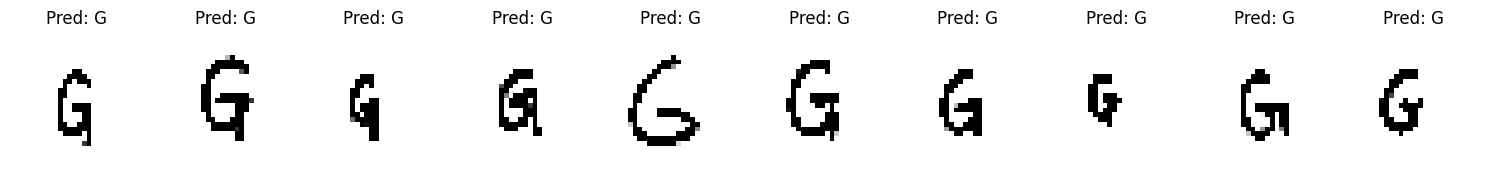

In [56]:
import matplotlib.pyplot as plt

# Display 5 samples of label "G"
def display_label_g_samples(X_test, y_test, predictions):
    samples = []

    # Collect 5 samples for label "G" (0)
    for i in range(len(y_test)):
        if y_test[i] == 0 and len(samples) < 10:
            samples.append((X_test[i], predictions[i]))
        if len(samples) >= 10:
            break

    # Plot the samples
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for idx, (sample, prediction) in enumerate(samples):
        image = sample.reshape(28, 28)
        axes[idx].imshow(image, cmap='gray')
        axes[idx].set_title(f"Pred: {'G' if prediction == 0 else 'N'}")
        axes[idx].axis('off')
        plt.tight_layout()
    plt.show()

# Display 5 samples of label "G"
display_label_g_samples(X_test, y_test, predictions)

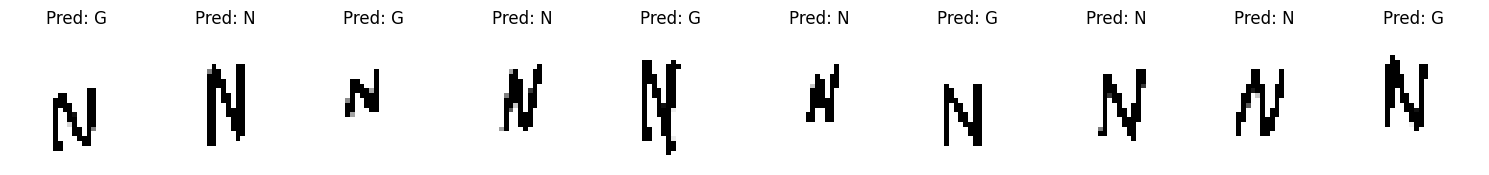

In [58]:
# Display 5 samples of label "G"
def display_label_n_samples(X_test, y_test, predictions):
    samples = []

    # Collect 5 samples for label "G" (0)
    for i in range(len(y_test)):
        if y_test[i] == 1 and len(samples) < 10:
            samples.append((X_test[i], predictions[i]))
        if len(samples) >= 10:
            break

    # Plot the samples
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for idx, (sample, prediction) in enumerate(samples):
        image = sample.reshape(28, 28)
        axes[idx].imshow(image, cmap='gray')
        axes[idx].set_title(f"Pred: {'G' if prediction == 0 else 'N'}")
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()
  # Display 5 samples of label "G"
display_label_n_samples(X_test, y_test, predictions)